In [1]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux 8.10 (Ootpa)

Matrix products: default
BLAS/LAPACK: /scratch/gpfs/KANG/hirak/mambaforge/envs/r43/lib/libopenblasp-r0.3.23.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: America/New_York
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] digest_0.6.35   IRdisplay_1.1   utf8_1.2.4      base64enc_0.1-3
 [5] fastmap_1.1.1   glue_1.7.0      htmltools_0.5.7 repr_1.1.6     
 [9] lifecycle_1.0.4 cli_3.6.2       

In [2]:
suppressPackageStartupMessages({
  library(Seurat)
  library(dplyr)
  library(ggplot2)
  library(scCustomize)
  library(scater)
    library(RColorBrewer)
    library(data.table)
    library(stringr)
library(tibble)
    library(tidyr)
    library(scDblFinder)
    library(scCustomize)
})

In [3]:
fig.size <- function (height, width, res=300) {
    options(repr.plot.height = height, repr.plot.width = width, resolution=res)
}

## Load Data

In [49]:
homo = readRDS(
    '../seurat_objects_2024_Cancer_Research/combined_new_5_homo.rds'
)
hemi = readRDS(
   '../seurat_objects_2024_Cancer_Research/combined_new_5_hemi.rds'
)
tumor.int = readRDS(
    '../seurat_objects_2024_Cancer_Research/20240901_6_sample_tumor_int.rds')

human_meta = read.csv('../human_homo_hemi_metadata/tumor_metadata.csv')
homo_meta = read.csv('../human_homo_hemi_metadata/homo_metadata.csv')
hemi_meta = read.csv('../human_homo_hemi_metadata/hemi_metadata.csv')
hemi@meta.data$annot.new = hemi_meta$annot.new
homo@meta.data$annot.new = homo_meta$annot.new
all_cell_types = union(union(
   unique(tumor.int$annot),
   unique(homo$annot.new)
    ),
   unique(hemi$annot.new)
)
color.list = ggthemes::tableau_color_pal('Tableau 20')(20)
#color.list = hue_pal()(15)
names(color.list) = all_cell_types

## Figure 1C Homozygous TH-MYCN (n=5) Hemizygous TH-MYCN (n=5)

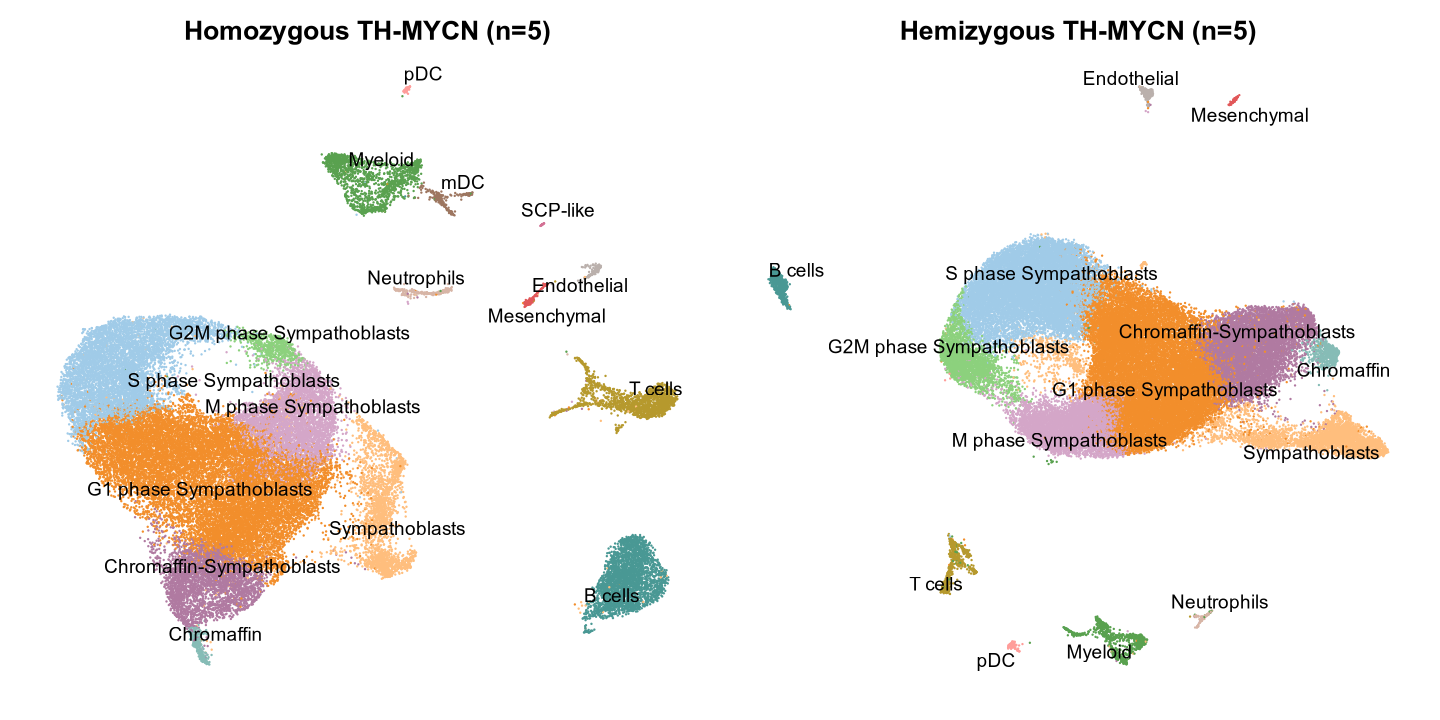

In [11]:
fig.size(6,12)

p.homo = DimPlot(homo, label=T, reduction="umap", group.by="annot.new",repel = T)+scale_color_manual(values = color.list) + ggtitle("Homozygous TH-MYCN (n=5)") + NoAxes() + NoLegend()
p.hemi = DimPlot(hemi, label=T, reduction="umap", group.by="annot.new",repel=T)+scale_color_manual(values = color.list) + ggtitle("Hemizygous TH-MYCN (n=5)") + NoAxes() + NoLegend()
p.homo | p.hemi

## Figure 1E

In [51]:
dotplot.sig.df = openxlsx::read.xlsx(
    '../20240805_Figure1C_Dotplot_5-Homozygous_Samples.xlsx',
    sheet ="Dotplot"
)
homo$annot = factor(
    homo$annot, levels=na.omit(dotplot.sig.df$Annotation)) 

In [58]:
dotplot.sig.df.hemi = openxlsx::read.xlsx(
    '../20240805_Figure1C_Dotplot_5-Hemizygous_Samples.xlsx',sheet = 'Dotplot'
)
hemi$annot = factor(
    hemi$annot, levels=na.omit(dotplot.sig.df.hemi$Annotation)) 

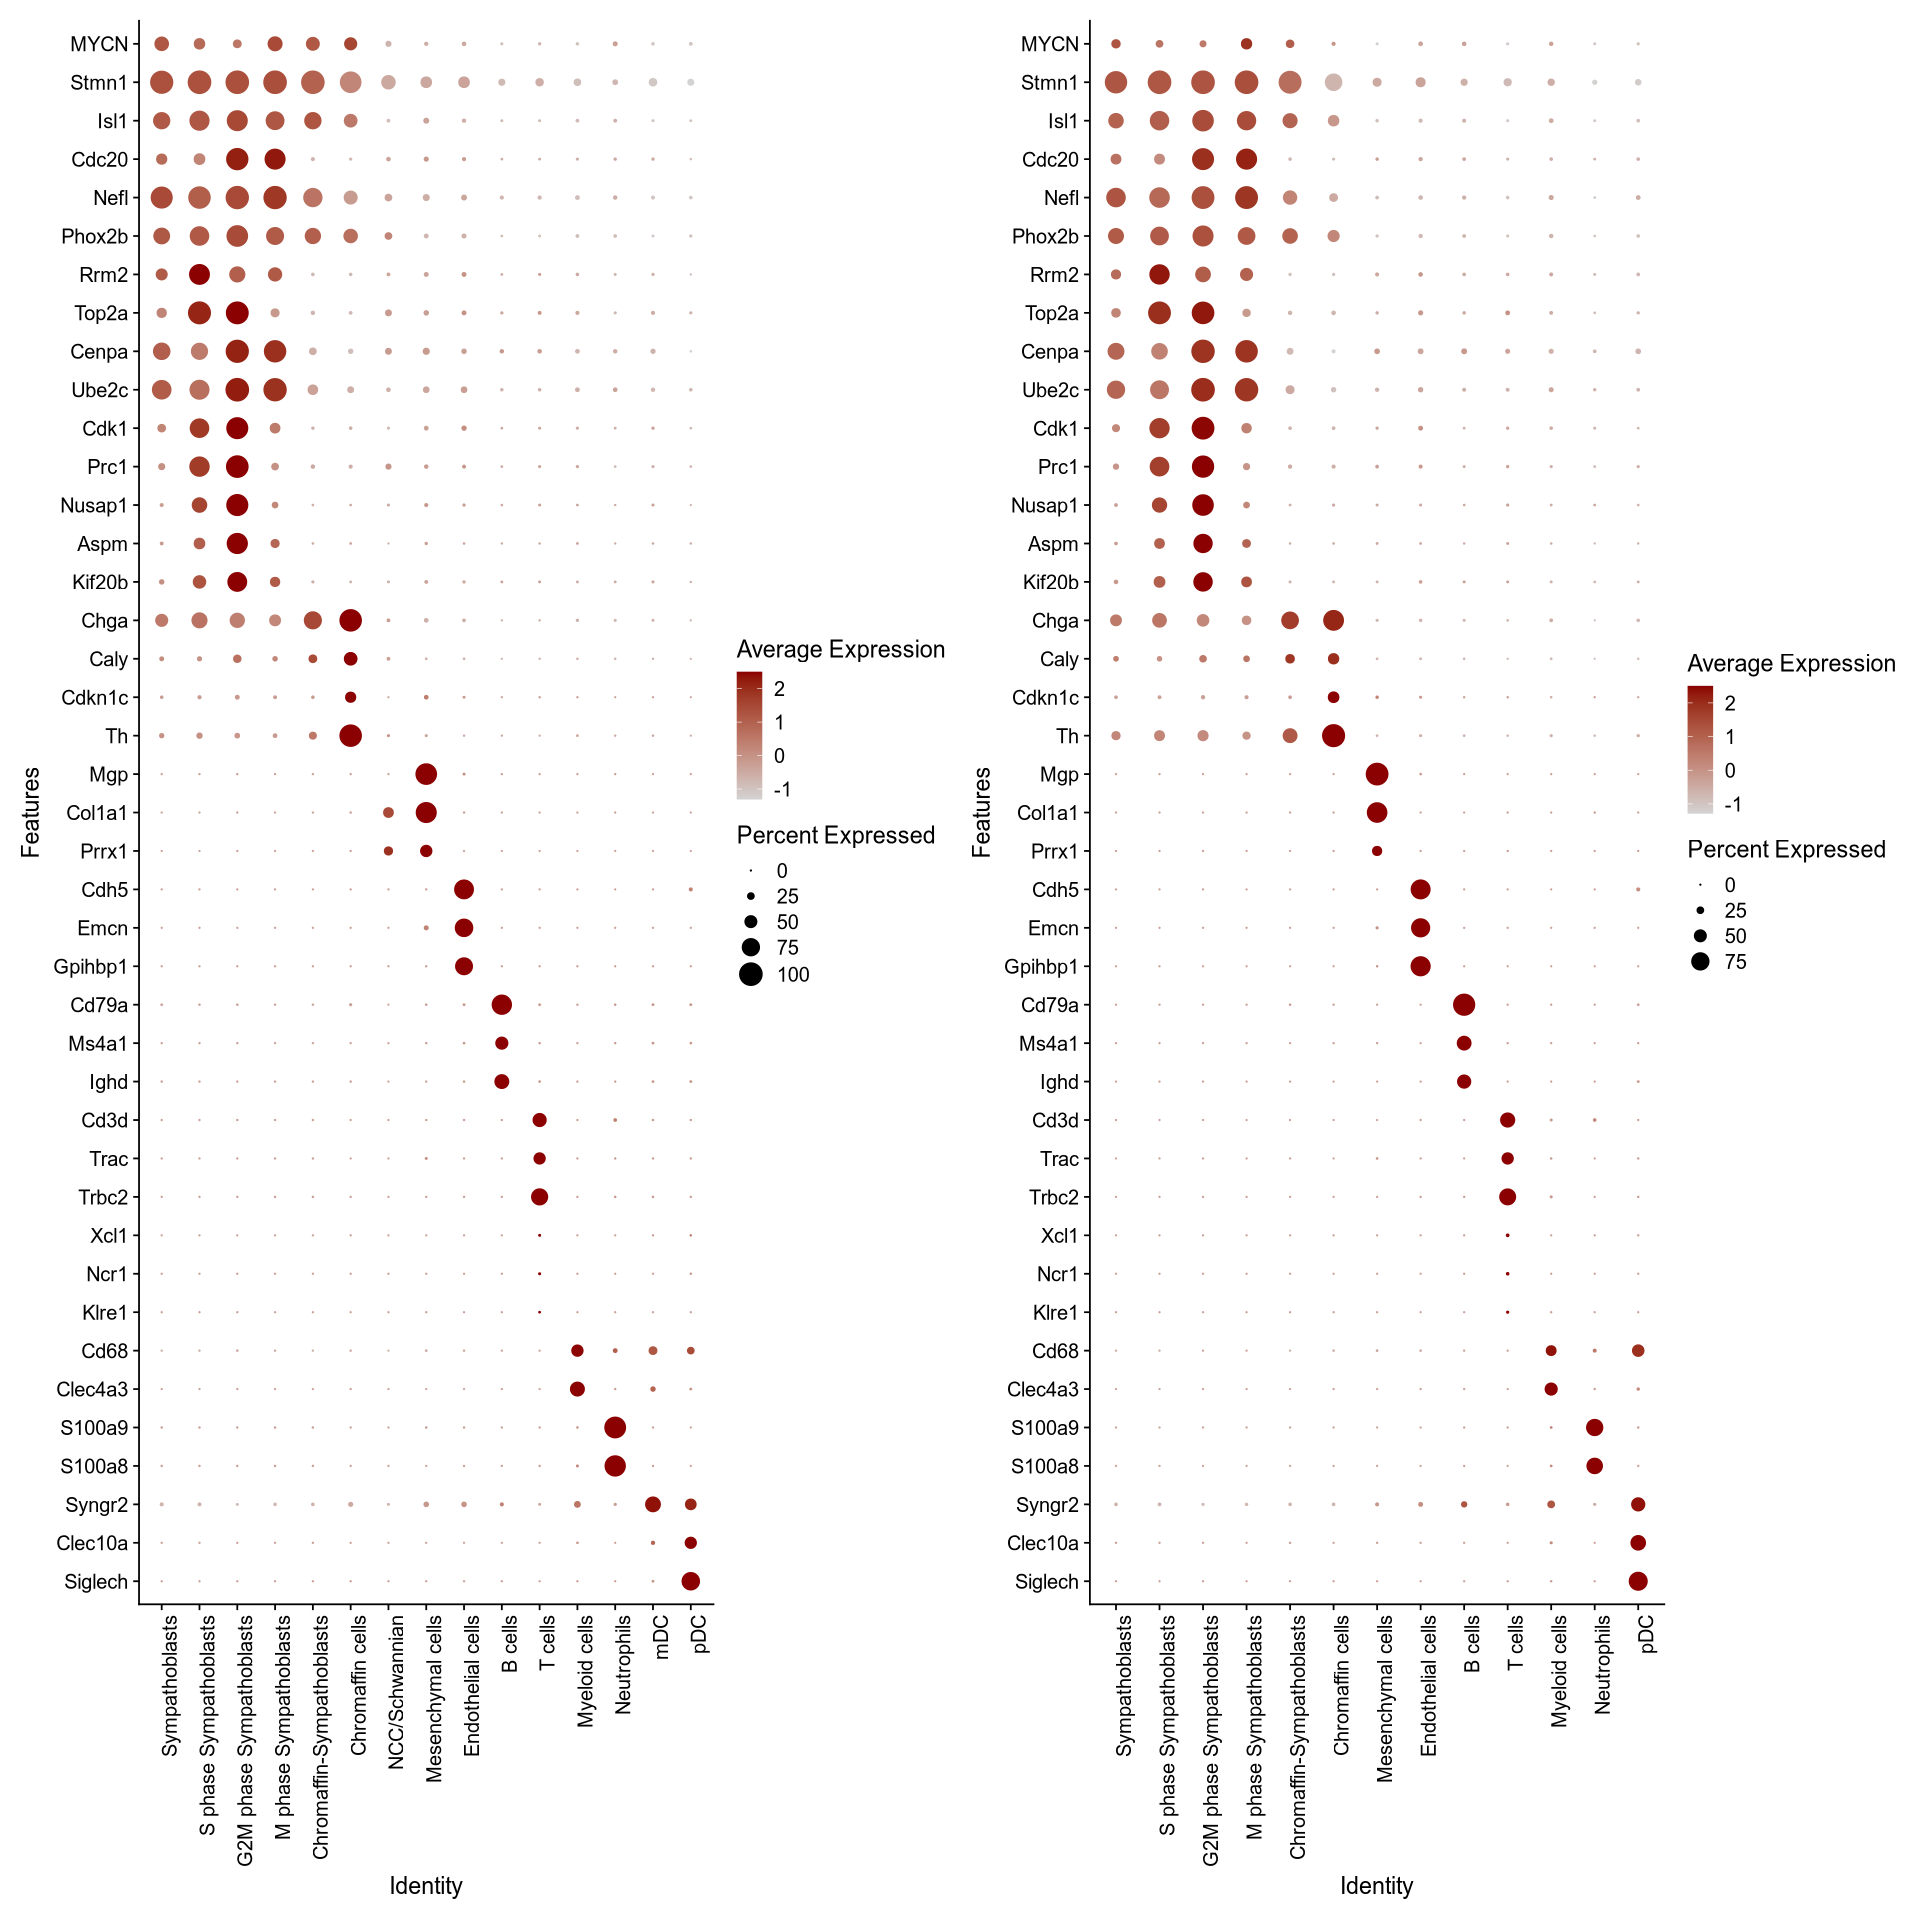

In [61]:
fig.size(16,16)
l1 = DotPlot(
        homo, 
        assay='RNA',
        features = dotplot.sig.df$Gene %>% rev,
        group.by='annot', 
        cols = c("lightgrey", "darkred"))+
         coord_flip()+theme(axis.text.x = element_text(angle = 90, hjust = 1))

l2 = DotPlot(
        hemi, 
        assay='RNA',
        features = dotplot.sig.df.hemi$Gene %>% rev,
        group.by='annot', 
        cols = c("lightgrey", "darkred"))+
         coord_flip()+theme(axis.text.x = element_text(angle = 90, hjust = 1))

l1 | l2

## Figure 1D

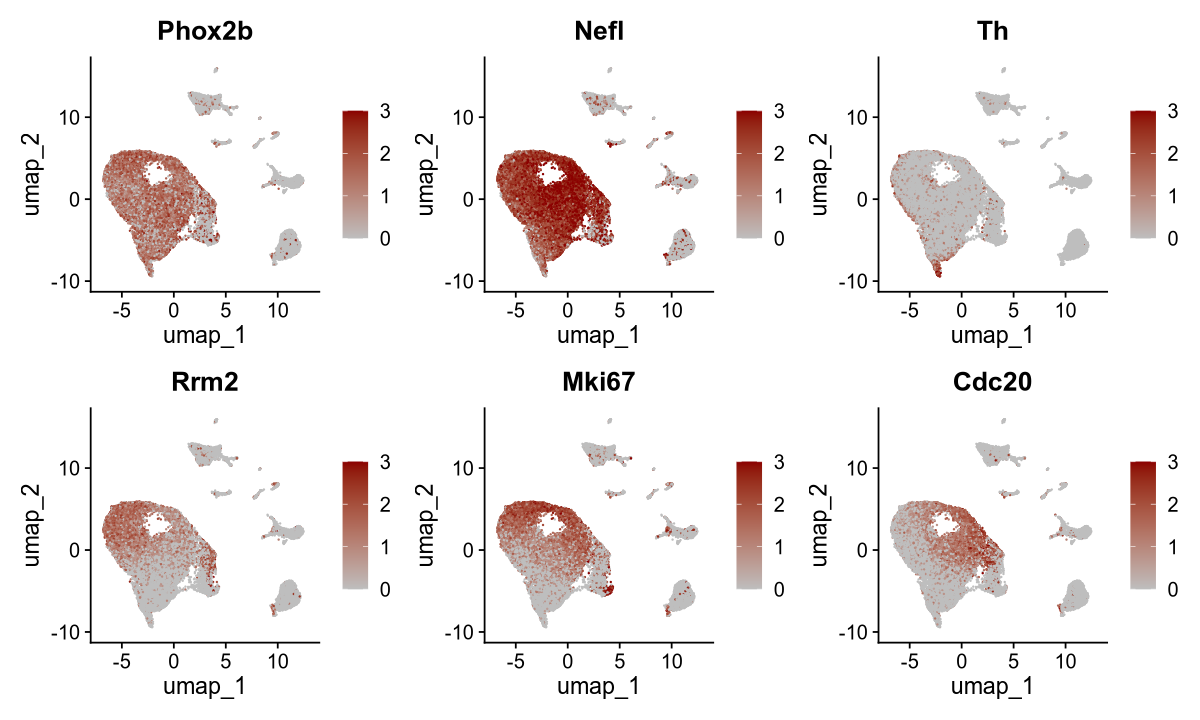

In [68]:
fig.size(6,10)
genes = c("Phox2b", "Nefl", "Th", "Rrm2", "Mki67", "Cdc20")
feat_plot = FeaturePlot(
    homo, 
    ncol=3,
    reduction = "umap",
    cols = c("grey", "darkred"),
    min.cutoff = 0,
    max.cutoff = 3,
    features = genes)
feat_plot

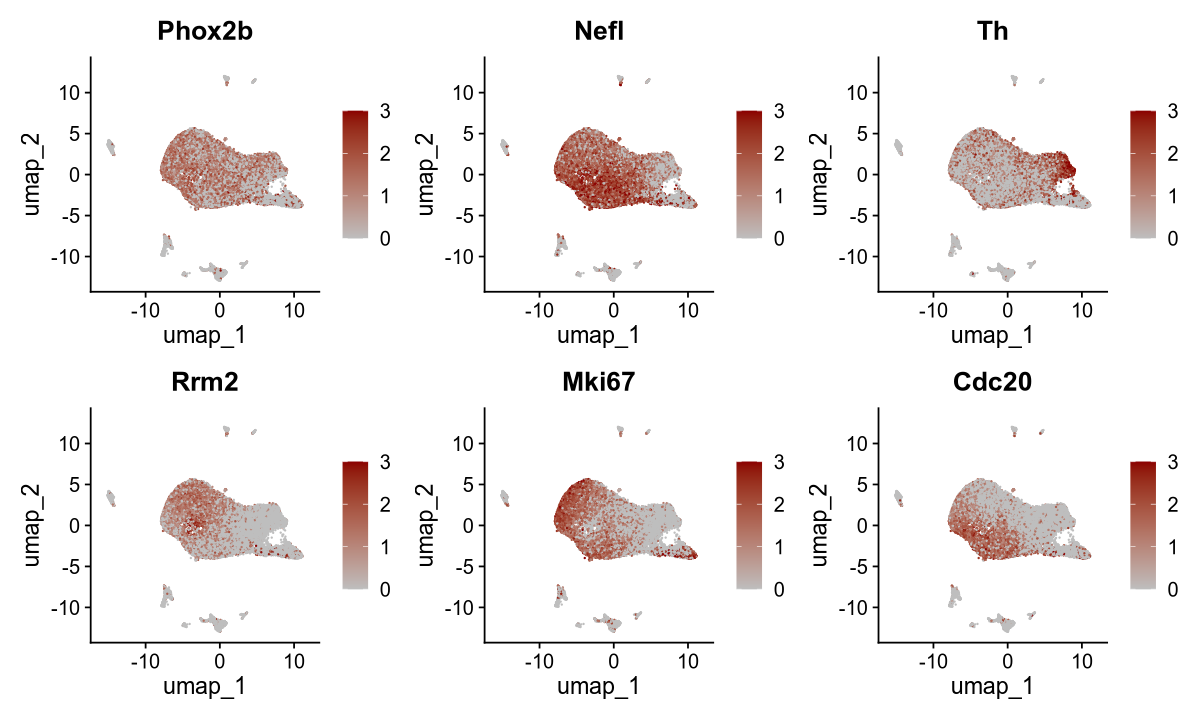

In [70]:
fig.size(6,10)
genes = c("Phox2b", "Nefl", "Th", "Rrm2", "Mki67", "Cdc20")
feat_plot = FeaturePlot(
    hemi, 
    ncol=3,
    reduction = "umap",
    cols = c("grey", "darkred"),
    min.cutoff = 0,
    max.cutoff = 3,
    features = genes)
feat_plot